In [88]:
# Robin Heinemann%matplotlib inline
import numpy as np

def taylor_exp(n, x):
    s = 1
    factorial = 1
    for k in range(1, n + 1):
        factorial *= k
        s += x**k / factorial
    return(s)

def taylor_exp_vec(n, x):
    return(np.polynomial.polynomial.polyval(x, np.append(np.array(1.), 1. / np.cumprod(np.arange(1, n + 1)))))

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


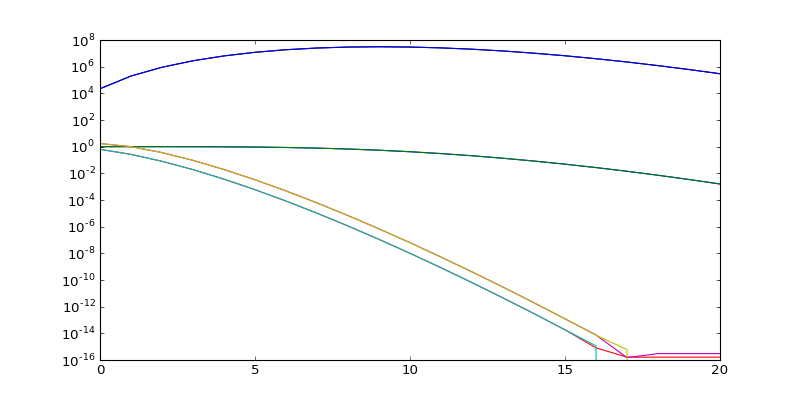

In [67]:
fig = plt.figure(figsize=(10, 5))
plt.yscale('log')
for x in [10, 1, -1, -10]:
    correct = np.exp(x)
    plt.plot(np.abs((list(map(lambda n: taylor_exp(n, x), range(21))) - correct) / correct))
    plt.plot(np.abs((list(map(lambda n: taylor_exp_vec(n, x), range(21))) - correct) / correct))

Die Ergebnisse für negative Zahlen sind schlecht, denn für $x$ negativ
ist das Vorzeichen alternierned, außerdem werden die einzelnen Elemente sehr schnell sehr klein, deswegen kommt es zur Auslöschung.

Eine einfache Lösung dafür ist $$\exp(-x) = \frac{1}{\exp{x}}$$

<IPython.core.display.Javascript object>


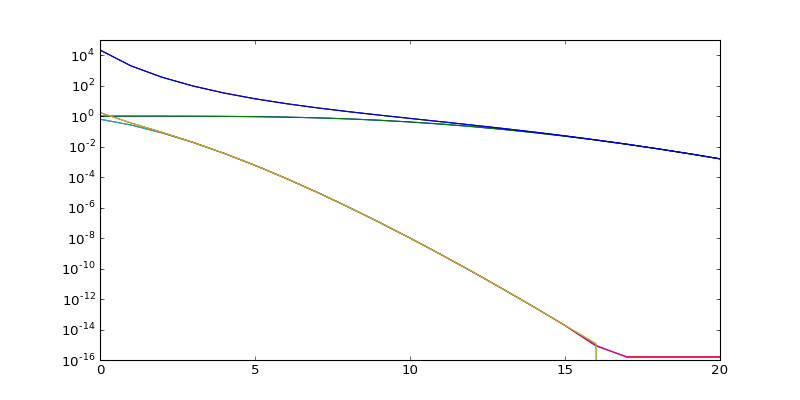

In [87]:
def taylor_exp(n, x):
    if x < 0:
        x *= -1
        was_negative = True
    else:
        was_negative = False
        
    s = 1
    factorial = 1
    for k in range(1, n + 1):
        factorial *= k
        s += x**k / factorial
    
    if was_negative:
        return(1. / s)
    else:
        return(s)

def taylor_exp_vec(n, x):
    if x < 0:
        x *= -1
        was_negative = True
    else: 
        was_negative = False
        
    s = np.polynomial.polynomial.polyval(x, np.append(np.array(1.), 1. / np.cumprod(np.arange(1, n + 1))))
        
    if was_negative:
        return(1. / s)
    else:
        return(s)
    
fig = plt.figure(figsize=(10, 5))
plt.yscale('log')
for x in [10, 1, -1, -10]:
    correct = np.exp(x)
    plt.plot(np.abs((list(map(lambda n: taylor_exp(n, x), range(21))) - correct) / correct))
    plt.plot(np.abs((list(map(lambda n: taylor_exp_vec(n, x), range(21))) - correct) / correct))